In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

In [3]:
header = '/mnt/e/MAG/mag-2021-01-05/advanced/'
fields_infos = 'FieldsOfStudy.txt'
fos_infos = pd.read_csv(header+fields_infos, header=None, sep='\t')[[0, 1, 2]]
fos_infos.columns = ['field_id', 'rank', 'normalized_name']

In [4]:
fields_mean = '''philosophy (21.068)
sociology (22.177)
history (22.406)
political science (24.719)
art (26.496)
business (29.660)
economics (30.021)
population (34.081)
mathematics (34.169)
psychology (43.658)
engineering (46.300)
computer science (47.405)
geography (56.792)
environmental science (58.489)
chemistry (63.759)
materials science (63.823)
physics (68.416)
biology (71.278)
geology (76.280)
medicine (91.420)'''.split('\n')
fields_mean = [fos.replace(')','').split(' (') for fos in fields_mean]
fields_input = [a for a,b in fields_mean]
mean = [float(b) for a,b in fields_mean]
fos_sorted_COLABS_AV = np.asarray(fields_input)

In [24]:
fos_infos_map = dict()
for f,m in zip(fields_input, mean):
    fos_infos_map[f] = {'median\nnumber of colabs' : m/np.max(mean)}

In [57]:
SUFFIX = 2020

WS = json.load(open('results/ws_10a_full_%d.json' % SUFFIX))
WP = json.load(open('results/wp_10a_full_%d.json' % SUFFIX))
FOS = json.load(open('results/fos_10a_full_%d.json' % SUFFIX))

WS = np.asarray(WS)
WP = np.asarray(WP)
FOS = np.asarray(FOS)
unique = np.unique(FOS)

def fos_sort(max_ws, fos):
    values = []
    fs = []
    count = []
    for field in unique:
        group = max_ws[fos == field]
        median = np.median(group)
        fs.append(field)
        values.append(median)
        count.append(len(group))
    values = np.asarray(values)
    fs = np.asarray(fs)
    count = np.asarray(count)
    idxs = np.argsort(values)
    values = values[idxs]
    fs = fs[idxs]
    count = count[idxs]
    
    return fs, values

fos_sorted, ws_vals = fos_sort(WS, FOS)
fos_sorted_WS = [fos_infos[fos_infos['field_id'] == field].iloc[0, -1] for field in fos_sorted]

fos_sorted, wp_vals = fos_sort(WP, FOS)
fos_sorted_WP = [fos_infos[fos_infos['field_id'] == field].iloc[0, -1] for field in fos_sorted]

In [61]:
max_v = np.max(ws_vals)
for f,v in zip(fos_sorted_WS, ws_vals):
    fos_infos_map[f]['cits top colab\ninfluence'] = v/max_v

max_v = np.max(wp_vals)
for f,v in zip(fos_sorted_WP, wp_vals):
    fos_infos_map[f]['papers top colab\ninfluence'] = v/max_v

In [62]:
fos_infos_pd = pd.DataFrame.from_dict(fos_infos_map, orient='index')
fos_infos_pd.reset_index(inplace=True)

table1 = fos_infos_pd.sort_values('papers top colab\ninfluence')[['index', 'papers top colab\ninfluence']]
table1.reset_index(inplace=True)
print(table1)
table2 = fos_infos_pd.sort_values('cits top colab\ninfluence')[['index', 'cits top colab\ninfluence']]
table2.reset_index(inplace=True)
print(table2)

a = pd.concat([table1, table2], ignore_index=True, axis=1, )

a.columns = ['0','Field', 'Top Colab. influence on papers', '1', 'Field', 'Top Colab. influence on citations']
print(a.head())
a = a.drop(columns=['0', '1'])
a.to_latex('fields_medians.tex', float_format="{:0.2f}".format, index=False)

    level_0                  index  papers top colab\ninfluence
0         2                history                     0.123529
1         4                    art                     0.123529
2         0             philosophy                     0.153659
3         1              sociology                     0.225000
4         3      political science                     0.244186
5         6              economics                     0.394737
6         7             population                     0.430769
7         5               business                     0.472500
8         8            mathematics                     0.480000
9        12              geography                     0.556254
10        9             psychology                     0.566667
11       18                geology                     0.592308
12       13  environmental science                     0.672000
13       11       computer science                     0.754688
14       10            engineering      

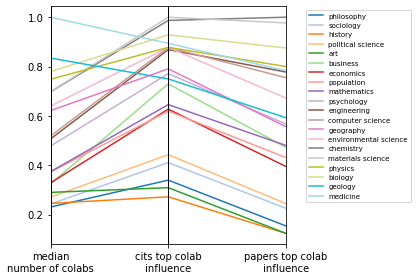

In [63]:
pd.plotting.parallel_coordinates(
    fos_infos_pd, 'index', colormap='tab20')
plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left', fontsize=7)
plt.tight_layout()
ax = plt.gca()
ax.grid(False)
plt.savefig('parallel_rank_metrics.pdf')

In [80]:
fos_infos_pd.columns

Index(['authors_colabs_average', 'ws', 'wp'], dtype='object')